<a href="https://www.kaggle.com/code/anjusukumaran4/wild-blueberry-yield-comparing-2-models?scriptVersionId=138042594" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

 ### Prediction of Wild Blueberry Yield and Comparing 2 Models [ XGBRegressor ,CatBoost ]

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
train_df=pd.read_csv('/kaggle/input/playground-series-s3e14/train.csv')
test_df=pd.read_csv('/kaggle/input/playground-series-s3e14/test.csv')

In [3]:
print('Shape of train dataset : ',train_df.shape)
print('Shape of test datset : ',test_df.shape)

Shape of train dataset :  (15289, 18)
Shape of test datset :  (10194, 17)


## EDA

In [4]:
train_df.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [5]:
train_df.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [7]:
train_df.describe()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,7644.000000,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,4413.698468,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,3822.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,7644.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,11466.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,15288.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


#### Coorelation heatmap

<Axes: >

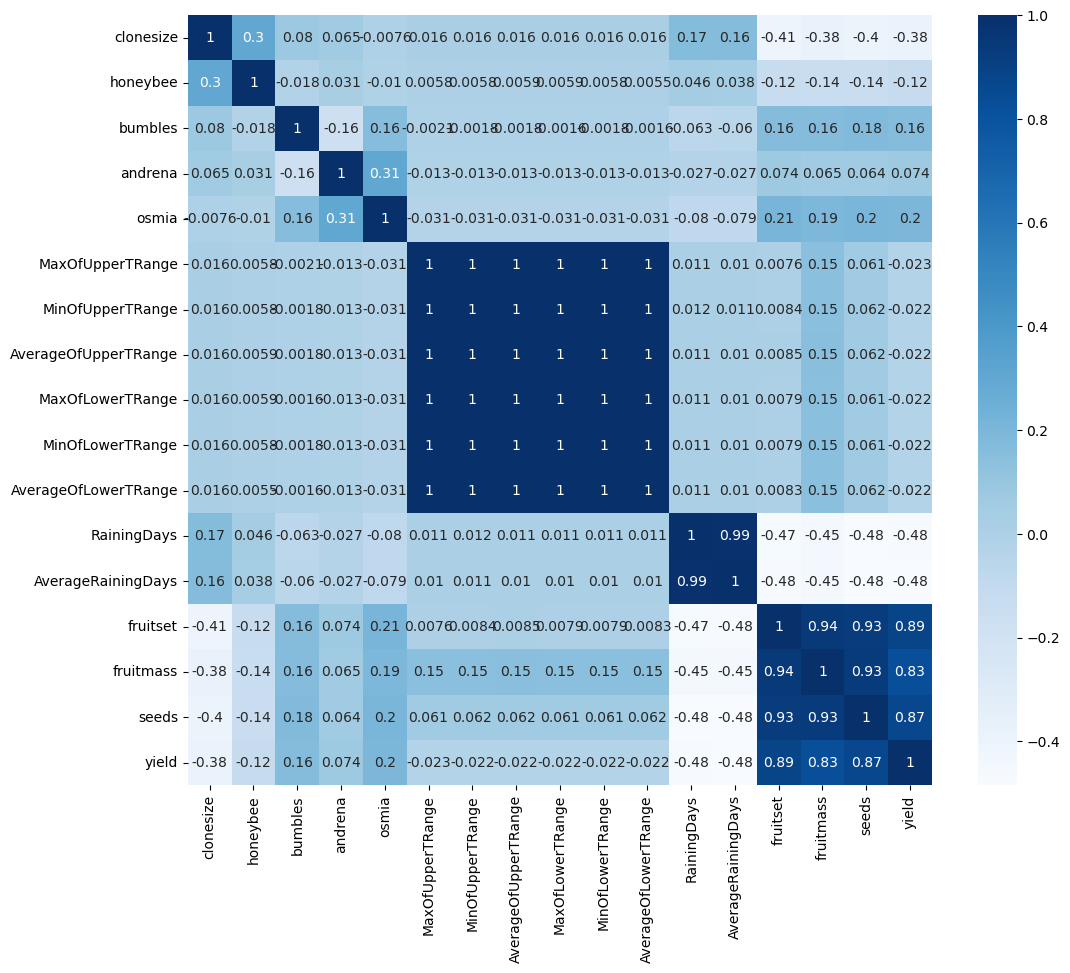

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(train_df.drop(['id'],axis=1).corr(),annot=True,cmap='Blues')

<Figure size 1200x1000 with 0 Axes>

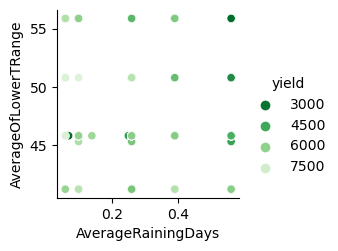

In [9]:
#showing how the vraiables are scattered
plt.figure(figsize=(12,10))
sns.pairplot(train_df,x_vars=['AverageRainingDays'],y_vars=['AverageOfLowerTRange'],hue='yield',kind='scatter',palette='Greens_r')

### Checking for null values

In [10]:
train_df.isnull().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

No null values in the dataset 

## Data Preprocessing

#### Checking for outliers

<Axes: >

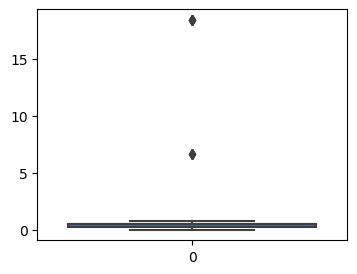

In [11]:
plt.figure(figsize=(4,3))
sns.boxplot(train_df['honeybee'])

In [12]:
#removing outliers in honebee column
train_df=train_df.drop(train_df[train_df['honeybee']>5].index)

<Axes: >

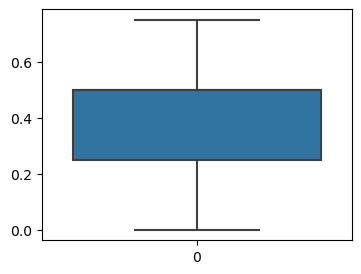

In [13]:
#after removing outliers
plt.figure(figsize=(4,3))
sns.boxplot(train_df['honeybee'])

<Axes: >

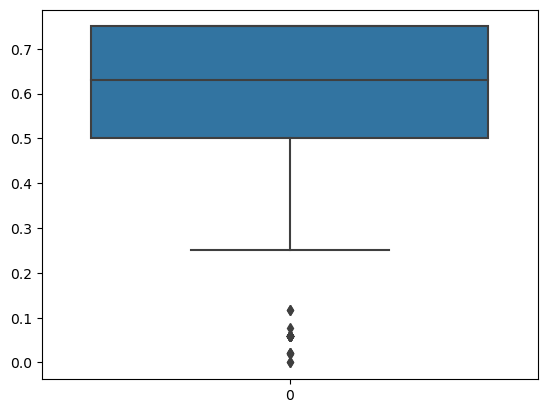

In [14]:
sns.boxplot(train_df['osmia'])

<Axes: >

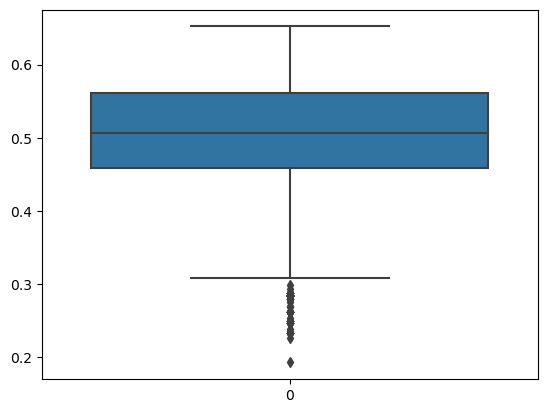

In [15]:
sns.boxplot(train_df['fruitset'])

<Axes: >

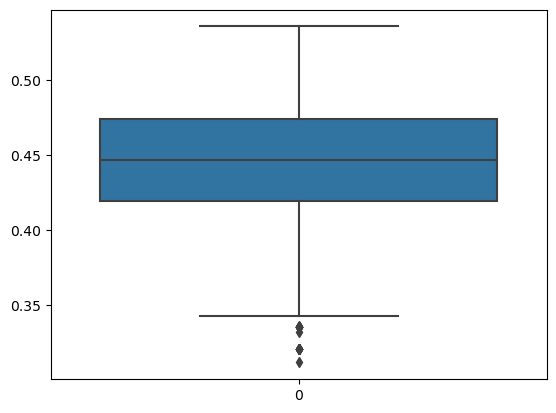

In [16]:
sns.boxplot(train_df['fruitmass'])

We can see that there are few outliers present in thease columns. Let's remove it.

#### Removing Outliers

In [17]:
train_df=train_df.drop(train_df[train_df['osmia']<0.2].index)
train_df=train_df.drop(train_df[train_df['fruitset']<0.28].index)
train_df=train_df.drop(train_df[train_df['fruitmass']<0.3].index)

In [18]:
print("Shape of train dataset after removing outliers : ",train_df.shape)

Shape of train dataset after removing outliers :  (15174, 18)


In [19]:
#fibal_df
train_df.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [20]:
X=train_df.drop('yield',axis=1)
y=train_df[['yield']]

#### Splitting data

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_val',X_val.shape)
print('y_val',y_val.shape)

X_train (12139, 17)
y_train (12139, 1)
X_val (3035, 17)
y_val (3035, 1)


### Normalize data

In [23]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_val=ss.fit_transform(X_val)

## Model Building

### XGBRegressor

In [24]:
from xgboost import XGBRegressor

xgb=XGBRegressor(n_estimators=1000,learning_rate=0.05)

#fit the model
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#### Prediction and mae

In [25]:
pred1=xgb.predict(X_val)

In [26]:
#to calculate mean absolute error MAE
from sklearn.metrics import mean_absolute_error

mae1=mean_absolute_error(pred1,y_val)
print('Mean Absolute Error : ',round(mae1,5))

Mean Absolute Error :  378.14427


### CatBoost

In [27]:
from catboost import CatBoostRegressor

cbr=CatBoostRegressor(learning_rate=0.08,verbose=False,random_state=0)

cbr.fit(X_train,y_train)

#### Prediction and mae

In [28]:
pred2=cbr.predict(X_val)

mae2=mean_absolute_error(pred2,y_val)
print('Mean Absolute Error : ',round(mae2,4))

Mean Absolute Error :  358.2799


### Model Comparison

In [29]:
mae=[mae1,mae2]
model=['XGBRegressor','CatBoost']
data={'Models':['XGBRegressor','CatBoost',],'MAE':[mae1,mae2]}
pd.DataFrame(data).style.background_gradient(cmap='Greens_r')

,Models,MAE
0,XGBRegressor,378.144269
1,CatBoost,358.279882


## Test Dataset exploration

In [30]:
test_df.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [31]:
test_df.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds'],
      dtype='object')

In [32]:
#checking for null values
test_df.isnull().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
dtype: int64

No null values

In [33]:
print('Shape of test datset : ',test_df.shape)

Shape of test datset :  (10194, 17)


## Submission

In [34]:
#hyperparameter tuning in xgb
xgb=XGBRegressor(n_estimators=863,learning_rate=0.004,random_state=0,max_depth=10,gamma=0.65,min_child_weight=42,tree_method='hist',subsample=0.7)

In [35]:
#fit the model
xgb.fit(X_train,y_train)

pred_f=xgb.predict(X_val)
mae_f=mean_absolute_error(pred_f,y_val)
print('Mean Absolute Error : ',round(mae_f,4))


Mean Absolute Error :  382.9481


In [36]:
pred_final=xgb.predict(test_df)
pred_final.shape

(10194,)

In [37]:
ID = test_df["id"] 
submission =pd.DataFrame({'id':ID,'yield':pred_final})

In [38]:
submission.to_csv("submission.csv",index=None)

In [39]:
submission.head()

,id,yield
0,15289,7633.728027
1,15290,7620.070312
2,15291,7625.689941
3,15292,7642.471680
4,15293,7630.310547
